In [1]:
import matplotlib.pyplot as plt
import math

In [3]:
def fft(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft(x[0::2])
    odd = fft(x[1::2])
    T = [complex(0, -2 * i * math.pi / N) for i in range(N // 2)]
    for i in range(N // 2):
        t = even[i]
        even[i] = t + odd[i] * T[i]
        odd[i] = t - odd[i] * T[i]
    return even + odd

def fft2d(image):
    rows, cols = len(image), len(image[0])

    # FFT along rows
    for i in range(rows):
        image[i] = fft(image[i])

    # FFT along columns
    for j in range(cols):
        column = [image[i][j] for i in range(rows)]
        column_fft = fft(column)
        for i in range(rows):
            image[i][j] = column_fft[i]

    return image


In [4]:
# Generate a 2D image
image_size = 128
x = [i * (4 * math.pi) / (image_size - 1) for i in range(image_size)]
y = [i * (4 * math.pi) / (image_size - 1) for i in range(image_size)]
X, Y = [[x_val for _ in range(image_size)] for x_val in x], [[y_val for y_val in y] for _ in range(image_size)]
image = [[math.sin(X[i][j]) + math.cos(Y[i][j]) for j in range(image_size)] for i in range(image_size)]


In [6]:
# Perform 2D FFT
fft_result_2d = fft2d(image)

TypeError: Image data of dtype complex128 cannot be converted to float

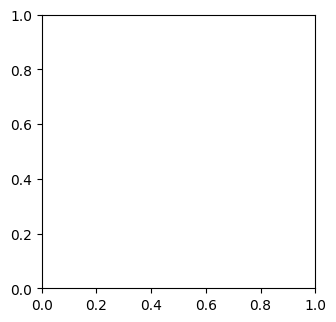

In [7]:
# Plot the results
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(132)
plt.imshow([[abs(fft_result_2d[i][j]) for j in range(image_size)] for i in range(image_size)], cmap='gray')
plt.title('2D FFT Magnitude')
plt.subplot(133)
plt.imshow([[math.atan2(fft_result_2d[i][j].imag, fft_result_2d[i][j].real) for j in range(image_size)] for i in range(image_size)], cmap='hsv')
plt.title('2D FFT Phase')
plt.show()